In [3]:
import arviz as az
from tms_risk.cogmodels.fit_probit import build_model, get_data
from tms_risk.cogmodels.utils import extract_intercept_gamma, format_bambi_ppc, plot_ppc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az
import os.path as op
import pingouin as pg
from IPython.display import display
sns.set_theme('paper', 'white', font='helvetica', font_scale=2, palette='tab10')

In [4]:
bids_folder = '/data/ds-tmsrisk'

stimulation_palette = sns.color_palette()[2:4]
stimulation_order = ['vertex', 'ips']

In [5]:
import bambi
bambi.__version__

'0.13.0'

# Simple model

In [4]:
# model_label = 'probit_simple_model_session'
model_label = 'probit_simple'

In [5]:
data = get_data(model_label, bids_folder)
model = build_model(model_label, data)
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))


intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

Dropping the baseline condition


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28097/1981991494.py:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  intercept = intercept.stack([1, 2])['intercept']
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28097/1981991494.py:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  gamma = gamma.stack([1, 2])['gamma']


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28097/548719550.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=gamma.reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax0)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28097/548719550.py:4: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method='silverman'`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=gamma.reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax0)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28097/548719550.py:34: FutureWarning: 

Passin

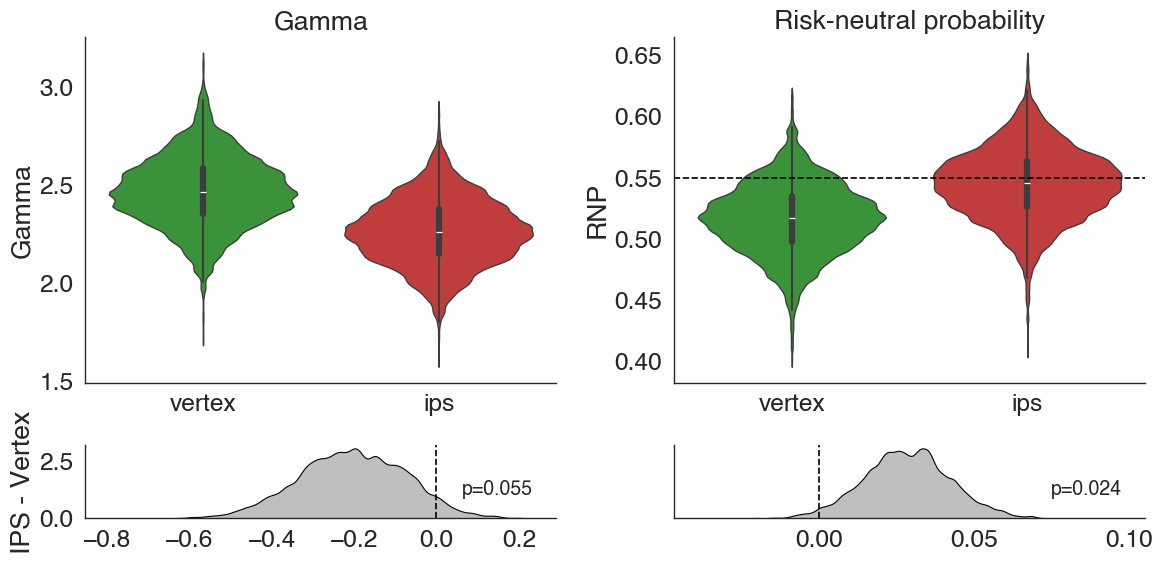

In [6]:
fig = plt.figure(figsize=(12, 6))

ax0 = plt.subplot2grid((4, 2), (0, 0), rowspan=3)
sns.violinplot(data=gamma.reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax0)
sns.despine()
ax0.set_xlabel(None)
ax0.set_ylabel('Gamma')


ax0.set_title('Gamma')

ax1 = plt.subplot2grid((4, 2), (3, 0))
gamma_delta = gamma.unstack('stimulation_condition')
gamma_delta = gamma_delta['ips'] - gamma_delta['vertex']
sns.kdeplot(gamma_delta, fill=True, color='k', ax=ax1)
ax1.set_title(None)
sns.despine()

ax1.set_xlabel(None)
ax1.set_ylabel('IPS - Vertex')

p = (gamma_delta > 0.0).mean()

ax1.text(0.8, 0.4, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax1.transAxes)

ax1.axvline(0.0, c='k', ls='--')


ax2 = plt.subplot2grid((4, 2), (0, 1), rowspan=3)
sns.violinplot(data=rnp.reset_index(), x='stimulation_condition', y='rnp', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax2)
sns.despine()
ax2.set_xlabel(None)
ax2.set_ylabel('RNP')
ax2.axhline(0.55, c='k', ls='--')

plt.tight_layout()

ax2.set_title('Risk-neutral probability')

ax3 = plt.subplot2grid((4, 2), (3, 1))

rnp_delta = rnp.unstack('stimulation_condition')
rnp_delta = rnp_delta['ips'] - rnp_delta['vertex']
sns.kdeplot(rnp_delta, color='k', fill=True, ax=ax3)

plt.axvline(0.0, c='k', ls='--')

sns.despine()


plt.ylabel(None)
plt.yticks([])
p = (rnp_delta < 0.0).mean()

ax3.text(0.8, 0.4, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax3.transAxes)

plt.tight_layout()

plt.savefig('/data/ds-tmsrisk/derivatives/figures/probit_simple_summary.pdf', bbox_inches='tight')
plt.savefig('/data/ds-tmsrisk/derivatives/figures/probit_simple_summary.png', bbox_inches='tight')

In [7]:
ppc = format_bambi_ppc(idata, model, data)

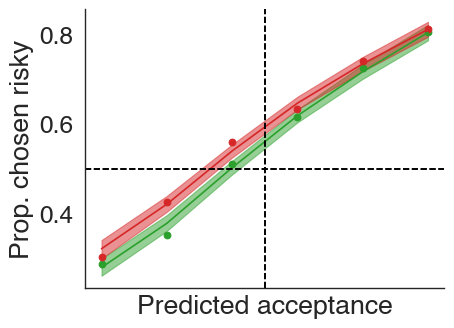

In [8]:
g = plot_ppc(data, ppc, 0, level='group', legend=False, aspect=1.25, height=4, var_name='p')

# g.set(aspect=1.)
# g.fig.set_
# g.fig.set_size_inches(12, 12)
# g.fig.set_size_inches(5, 12)
g.set(xticks=[])

g.savefig('/data/ds-tmsrisk/derivatives/figures/probit_simple_ppc.pdf')
g.savefig('/data/ds-tmsrisk/derivatives/figures/probit_simple_ppc.png')

## Subjectwise parameterss

In [11]:
intercept, gamma = extract_intercept_gamma(idata, model, data, group=False)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')


rnp

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28097/460804708.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  intercept = intercept.stack([1, 2])['intercept']
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28097/460804708.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  gamma = gamma.stack([1, 2])['gamma']


subject  n_safe  risky_first  session3  stimulation_condition  session  chain  draw
1        28.0    False        False     vertex                 2        0      0       0.466878
                                                                               1       0.449787
                                                                               2       0.441625
                                                                               3       0.502008
                                                                               4       0.439171
                                                                                         ...   
74       14.0    True         True      ips                    3        3      995     0.328631
                                                                               996     0.362370
                                                                               997     0.295275
                                                    

,n,r,CI95%,p-val,BF10,power
pearson,35,0.759418,"[0.57, 0.87]",1.229239e-07,1.389e+05,0.999903


,n,r,CI95%,p-val,BF10,power
pearson,35,0.923272,"[0.85, 0.96]",2.886177e-15,1.791e+12,1.0


,n,r,CI95%,p-val,BF10,power
pearson,35,-0.437785,"[-0.67, -0.12]",0.008535,5.828,0.766839


,n,r,CI95%,p-val,BF10,power
pearson,35,-0.437785,"[-0.67, -0.12]",0.008535,5.828,0.766839


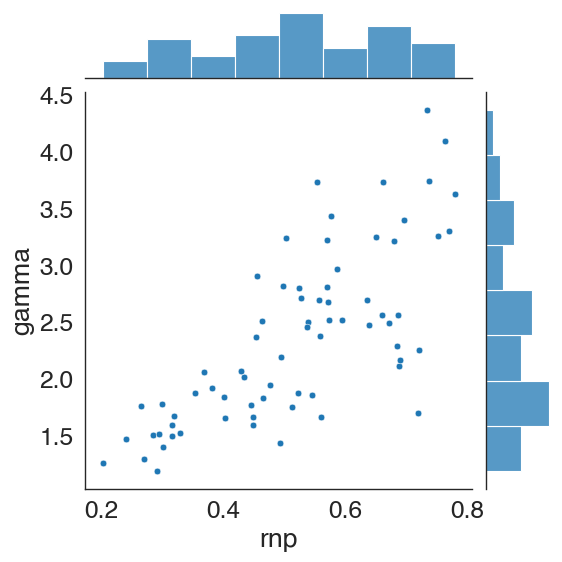

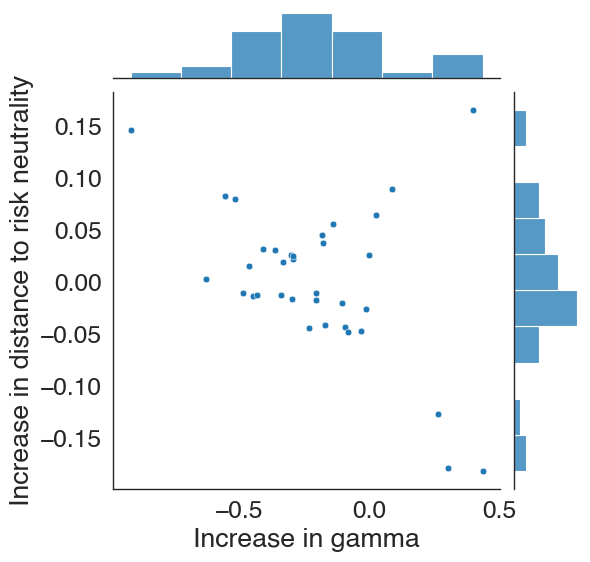

In [50]:
mean_rnp = rnp.groupby(['subject', 'stimulation_condition']).mean().to_frame('rnp')
mean_gamma = gamma.groupby(['subject', 'stimulation_condition']).mean().to_frame('gamma')

mean_pars = mean_rnp.join(mean_gamma)

display(pg.corr(mean_pars['rnp'].groupby('subject').mean(), mean_pars['gamma'].groupby('subject').mean()))
sns.jointplot(data=mean_pars.reset_index(), x='rnp', y='gamma')


gamma_diff = mean_gamma.unstack('stimulation_condition')['gamma']
gamma_diff = gamma_diff['ips'] - gamma_diff['vertex']

rnp_diff = mean_rnp.unstack('stimulation_condition')['rnp']
rnp_diff = rnp_diff['ips'] - rnp_diff['vertex']

display(pg.corr(rnp_diff, gamma_diff))

distance_to_risk_neutrality = np.abs(mean_rnp - .55)
distance_to_risk_neutrality_diff = distance_to_risk_neutrality.unstack('stimulation_condition')['rnp']
distance_to_risk_neutrality_diff = distance_to_risk_neutrality_diff['ips'] - distance_to_risk_neutrality_diff['vertex']

diff = distance_to_risk_neutrality_diff.to_frame("Increase in distance to risk neutrality").join(gamma_diff.to_frame('Increase in gamma'))

sns.jointplot(data=diff.reset_index(), x='Increase in gamma', y='Increase in distance to risk neutrality', )

display(pg.corr(diff['Increase in gamma'], diff['Increase in distance to risk neutrality']))
pg.corr(diff['Increase in gamma'], diff['Increase in distance to risk neutrality'])

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28097/3256511801.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff['Increase in distance to risk neutrality'], kde=False)


<Axes: xlabel='Increase in distance to risk neutrality'>

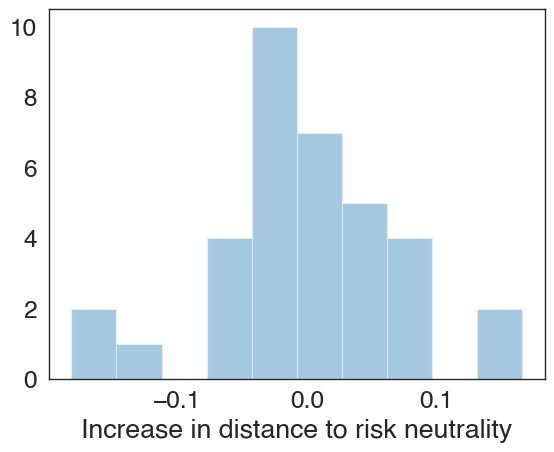

In [42]:
sns.distplot(diff['Increase in distance to risk neutrality'], kde=False)

In [ ]:
from scipy import stats as ss



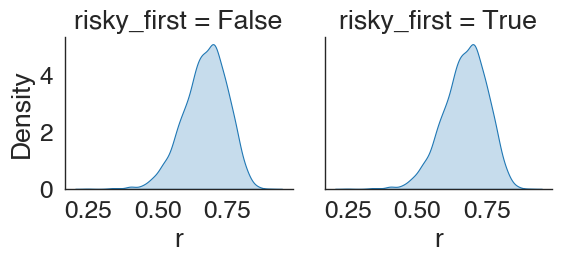

In [70]:
tmp = pd.concat((gamma, rnp), axis=1).groupby(['subject', 'risky_first', 'chain', 'draw']).mean()
r = tmp.groupby(['chain', 'draw', 'risky_first']).apply(lambda d: ss.pearsonr(d['gamma'], d['rnp'])[0])
g = sns.FacetGrid(r.to_frame('r').reset_index(), col='risky_first', sharex=False)

g.map(sns.kdeplot, 'r', fill=True)

0.7463252624779827

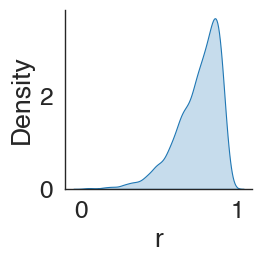

In [84]:
tmp = pd.concat((gamma, rnp), axis=1).groupby(['subject', 'stimulation_condition', 'chain', 'draw']).mean()

tmp = tmp.unstack('stimulation_condition')

gamma_diff = tmp['gamma']['ips'] - tmp['gamma']['vertex']
gamma_diff.rename('gamma_diff', inplace=True)
rnp_diff = tmp['rnp']['ips'] - tmp['rnp']['vertex']
rnp_diff.rename('rnp_diff', inplace=True)

diff = pd.concat((gamma_diff, rnp_diff), axis=1)
r = diff.groupby(['chain', 'draw']).apply(lambda d: ss.pearsonr(d['gamma_diff'], d['rnp_diff'])[0])
g = sns.FacetGrid(r.to_frame('r').reset_index(), sharex=False)
g.map(sns.kdeplot, 'r', fill=True)


r.mean()

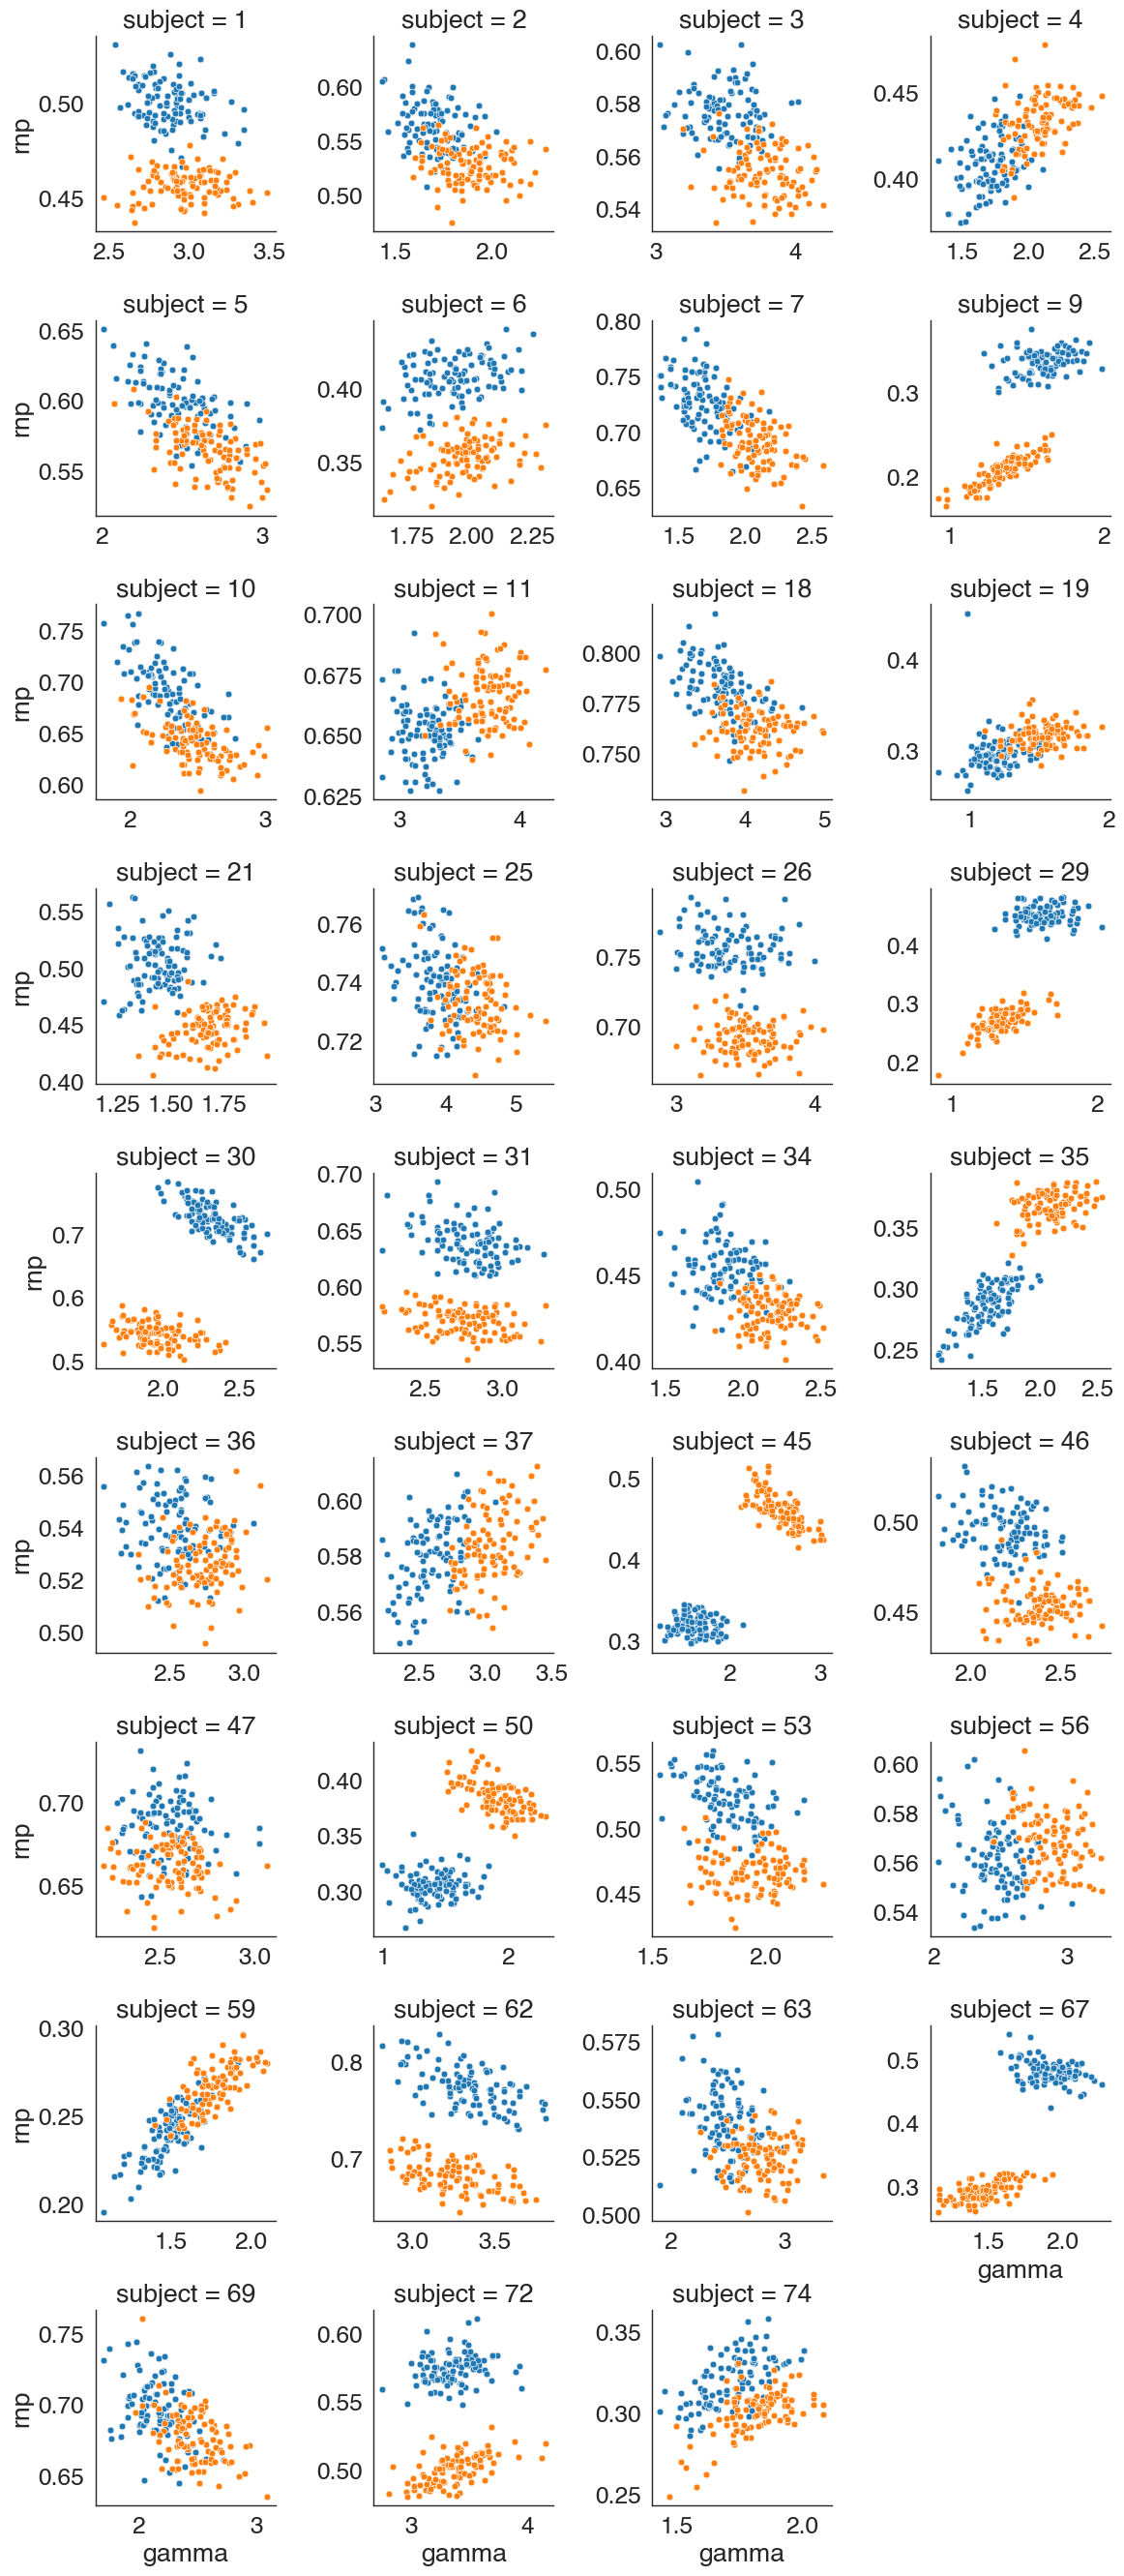

In [151]:
pars = gamma.to_frame().join(rnp)
pars = pars.xs(slice(None, None, 10), level='draw', drop_level=False).groupby(['subject', 'draw', 'session', 'stimulation_condition']).mean()

g = sns.FacetGrid(pars.reset_index(), col='subject', sharex=False, hue='stimulation_condition', col_wrap=4, sharey=False)

g.map(sns.scatterplot, 'gamma', 'rnp')

In [153]:
subjectwise_pars

value     lower     upper
parameter subject                              
gamma     1        2.924128  2.159133  3.697442
          2        1.791332  1.236115  2.374413
          3        3.648215  2.705721  4.581419
          4        1.912339  1.159178  2.675746
          5        2.578323  1.806266  3.379711
...                     ...       ...       ...
rnp       63       0.532220  0.459285  0.617724
          67       0.387333  0.227370  0.546571
          69       0.686280  0.577236  0.796373
          72       0.538065  0.444996  0.642367
          74       0.309598  0.229780  0.391184

[70 rows x 3 columns]

parameter,gamma,rnp,gamma,rnp,gamma,rnp
,value,value,lower,lower,upper,upper
subject,,,,,,
1,2.924128,0.477156,2.159133,0.412312,3.697442,0.555169
2,1.791332,0.544488,1.236115,0.430068,2.374413,0.685102
3,3.648215,0.564786,2.705721,0.507996,4.581419,0.618076
4,1.912339,0.422112,1.159178,0.299511,2.675746,0.540188
5,2.578323,0.580847,1.806266,0.475081,3.379711,0.676792
6,1.958078,0.380988,1.365915,0.255106,2.527565,0.514733
7,1.909708,0.709008,1.133086,0.578317,2.758764,0.852400
9,1.472604,0.271926,0.790787,0.109473,2.189346,0.447039


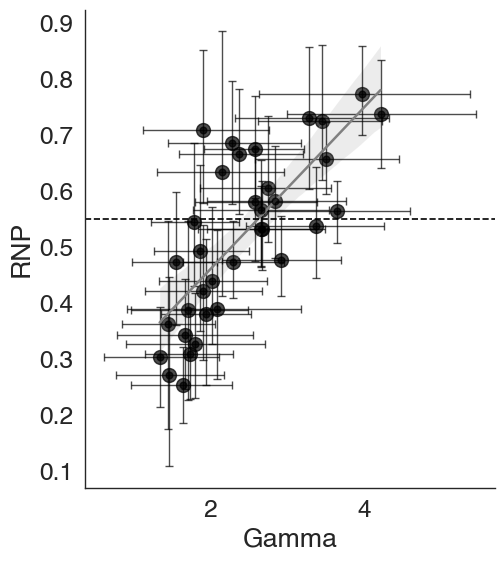

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten the columns by renaming for simplicity in plotting
subjectwise_pars_flat = subjectwise_pars.copy()
subjectwise_pars_flat.columns = ['gamma_value', 'gamma_lower', 'gamma_upper', 'rnp_value', 'rnp_lower', 'rnp_upper']

# Set up FacetGrid
g = sns.FacetGrid(data=subjectwise_pars_flat.reset_index())

# Plot scatterplot
g.map_dataframe(
    sns.scatterplot, x='gamma_value', y='rnp_value',
    s=100, edgecolor=None, linewidth=1, alpha=0.7, color='k'
)

# Add error bars
g.map_dataframe(
    lambda data, **kwargs: plt.errorbar(
        x=data['gamma_value'],
        y=data['rnp_value'],
        xerr=[data['gamma_value'] - data['gamma_lower'], data['gamma_upper'] - data['gamma_value']],
        yerr=[data['rnp_value'] - data['rnp_lower'], data['rnp_upper'] - data['rnp_value']],
        fmt='o', color='k', ecolor='k', elinewidth=1., capsize=3, alpha=.7,
    )
)

# Add regression line without scatter points
g.map_dataframe(sns.regplot, x='gamma_value', y='rnp_value', scatter=False, color='gray')

# Set labels and grid size
g.set(xlabel='Gamma', ylabel='RNP')
g.fig.set_size_inches(8, 8)

# Add horizontal line
plt.axhline(0.55, c='k', ls='--')

# Probit with order

In [86]:
model_label = 'probit_order'

In [87]:
data = get_data(model_label, bids_folder)
model = build_model(model_label, data)

idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))

Dropping the baseline condition


In [97]:
from tms_risk.cogmodels.utils import get_fake_data, invprobit, extract_intercept_gamma


In [98]:
group = True
trace = idata
fake_data = get_fake_data(data, group)

# pred = model.predict(trace, 'mean', fake_data, inplace=False, include_group_specific=not group)['posterior']['p']

intercept, gamma = extract_intercept_gamma(trace, model, data, group=group)

In [99]:

intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28097/1500852943.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  intercept = intercept.stack([1, 2])['intercept']
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28097/1500852943.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  gamma = gamma.stack([1, 2])['gamma']


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28097/3067178552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=gamma.xs(False, 0, 'risky_first').reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax0)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28097/3067178552.py:4: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method='silverman'`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=gamma.xs(False, 0, 'risky_first').reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax0)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/

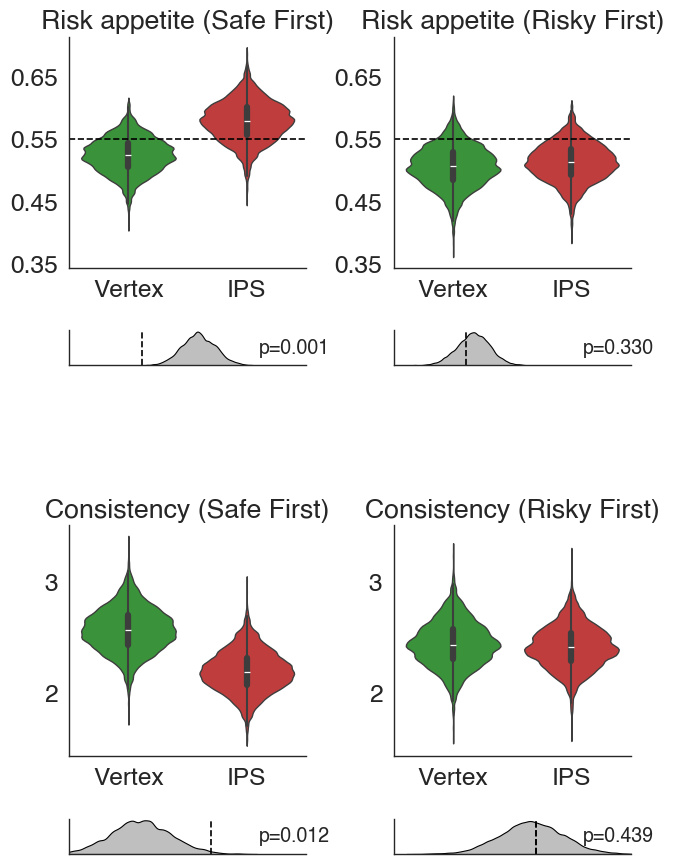

In [100]:
fig = plt.figure(figsize=(7, 10))

ax0 = plt.subplot2grid((10, 2), (5, 0), rowspan=3)
sns.violinplot(data=gamma.xs(False, 0, 'risky_first').reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax0)
sns.despine()
ax0.set_xlabel(None)
ax0.set_ylabel(None)
ax0.set_xticklabels(['Vertex', 'IPS'])
ax0.set_title('Consistency (Safe First)')

ax1 = plt.subplot2grid((10, 2), (5, 1), rowspan=3, sharey=ax0)
sns.violinplot(data=gamma.xs(True, 0, 'risky_first').reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax1)
sns.despine()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_title('Consistency (Risky First)')
ax1.set_xticklabels(['Vertex', 'IPS'])

gamma_delta = gamma.unstack('stimulation_condition')

gamma_delta = gamma_delta['ips'] - gamma_delta['vertex']

ax2 = plt.subplot2grid((10, 2), (8, 0))
sns.kdeplot(gamma_delta.xs(False, 0, 'risky_first'), fill=True, color='k', ax=ax2)
sns.despine()

ax2.set_xlabel(None)

ax2.set_ylabel(None)
ax2.axvline(0.0, c='k', ls='--')
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_xlim(-0.75, 0.5)

p = (gamma_delta.xs(False, 0, "risky_first") > 0.0).mean()

ax2.text(0.8, 0.5, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax2.transAxes)


ax3 = plt.subplot2grid((10, 2), (8, 1), sharex=ax2, sharey=ax2)
ax3.axvline(0.0, c='k', ls='--')
sns.kdeplot(gamma_delta.xs(True, 0, 'risky_first'), fill=True, color='k', ax=ax3)
sns.despine()

ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.set_yticks([])

p = (gamma_delta.xs(True, 0, "risky_first") > 0.0).mean()

ax3.text(0.8, 0.5, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax3.transAxes)

ax3.axvline(0.0, c='k', ls='--')

ax4 = plt.subplot2grid((10, 2), (0, 0), rowspan=3)
sns.violinplot(data=rnp.xs(False, 0, 'risky_first').reset_index(), x='stimulation_condition', y='rnp', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax4)
sns.despine()
ax4.set_xlabel(None)
ax4.set_ylabel(None)
ax4.set_title('Risk appetite (Safe First)')
ax4.axhline(0.55, c='k', ls='--')
ax4.set_xticklabels(['Vertex', 'IPS'])
ax4.set_yticks([0.35, 0.45, 0.55, 0.65, 0.75])

ax5 = plt.subplot2grid((10, 2), (0, 1), rowspan=3, sharey=ax4)
sns.violinplot(data=rnp.xs(True, 0, 'risky_first').reset_index(), x='stimulation_condition', y='rnp', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax5)
sns.despine()
ax5.set_xlabel(None)
ax5.set_ylabel(None)
ax5.set_title('Risk appetite (Risky First)')
ax5.set_xticklabels(['Vertex', 'IPS'])
ax5.axhline(0.55, c='k', ls='--')


rnp_delta = rnp.unstack('stimulation_condition')
rnp_delta = rnp_delta['ips'] - rnp_delta['vertex']

ax6 = plt.subplot2grid((10, 2), (3, 0))
sns.kdeplot(rnp_delta.xs(False, 0, 'risky_first'), color='k', fill=True, ax=ax6)
ax6.set_xticks([])

p = (rnp_delta.xs(False, 0, "risky_first") < 0.0).mean()
ax6.text(0.8, 0.5, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax6.transAxes)

plt.axvline(0.0, c='k', ls='--')

ax6.set_ylabel(None)
ax6.set_yticks([])
sns.despine()



ax7 = plt.subplot2grid((10, 2), (3, 1), sharex=ax6, sharey=ax6)
sns.kdeplot(rnp_delta.xs(True, 0, 'risky_first'), color='k', fill=True, ax=ax7)

p = (rnp_delta.xs(True, 0, "risky_first") < 0.0).mean()
ax7.text(0.8, 0.5, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax7.transAxes)

ax7.set_ylabel(None)
ax7.set_yticks([])

plt.axvline(0.0, c='k', ls='--')

sns.despine()
plt.tight_layout()

plt.savefig('/data/ds-tmsrisk/derivatives/figures/probit_order_summary.pdf', bbox_inches='tight')
plt.savefig('/data/ds-tmsrisk/derivatives/figures/probit_order_summary.png', bbox_inches='tight')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28097/2703766167.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.violinplot(data=gamma.xs(False, 0, 'risky_first').reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw=.5, axes=ax0)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28097/2703766167.py:6: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.5`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  g = sns.violinplot(data=gamma.xs(False, 0, 'risky_first').reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw=.5, axes=ax0)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28

[Text(-1.0, 0, ''), Text(0.0, 0, '0.0'), Text(1.0, 0, '')]

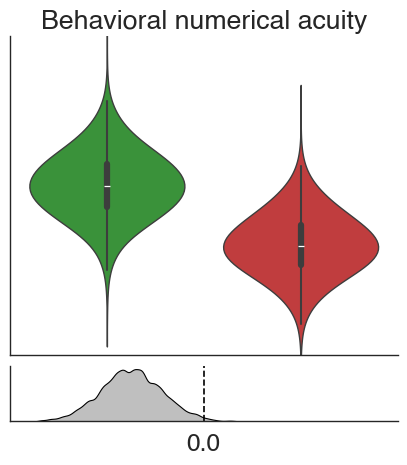

In [101]:
#

# fig, axes = plt.subplots(1, 2, figsize=(5, 6))

ax0 = plt.subplot2grid((6, 1), (0, 0), rowspan=5)
g = sns.violinplot(data=gamma.xs(False, 0, 'risky_first').reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw=.5, axes=ax0)
sns.despine()
ax0.set_yticks([1., 2., 3.])
ax0.set_yticks([])
ax0.set_ylim(1.5, 3.5)
#Make sure the aspect ratio is 1
# g.set_aspect(1.)

g.figure.set_size_inches(5, 5)
g.set_xlabel(None)
g.set_ylabel(None)

g.set_xticklabels(['Vertex', 'IPS'])
g.set_title('Behavioral numerical acuity')


ax1 = plt.subplot2grid((6, 1), (5, 0), rowspan=5)
gamma_delta = gamma.unstack('stimulation_condition')
gamma_delta = gamma_delta['ips'] - gamma_delta['vertex']

sns.kdeplot(gamma_delta.xs(False, 0, 'risky_first'), fill=True, color='k', ax=ax1)
sns.despine()

ax1.set_ylabel(None)
ax1.set_xlabel(None)
ax1.set_yticks([])
ax1.axvline(0.0, c='k', ls='--')
ax1.set_xlim(-1., 1.)
ax1.set_xticks([-1, 0.0, 1.])
ax1.set_xticklabels(['', 0.0, ''])

In [102]:
ppc = format_bambi_ppc(idata, model, data)

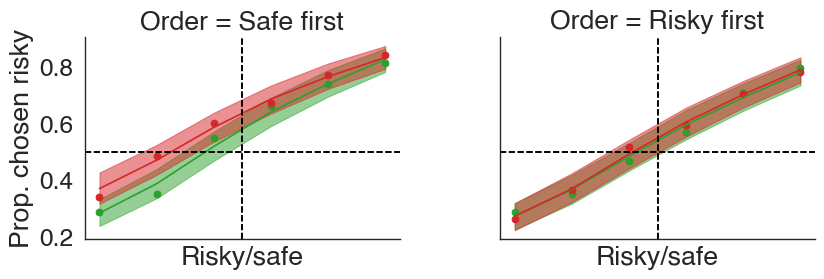

In [103]:
g = plot_ppc(data, ppc, 7, level='group', var_name='ll_bernoulli', legend=False)

g.fig.set_size_inches(10, 4)

g.set(xticks=[], xlabel='Risky/safe')
# g.set_xlabel('Risky/safe (a.u.)')

g.savefig(op.join(bids_folder, 'derivatives', 'figures', 'probit_order_ppc.pdf'))

In [104]:
diff_risky_first = rnp.xs('ips', 0, 'stimulation_condition').xs(True, 0, 'risky_first') -  rnp.xs('vertex', 0, 'stimulation_condition').xs(True, 0, 'risky_first')
diff_safe_first = rnp.xs('ips', 0, 'stimulation_condition').xs(False, 0, 'risky_first') -  rnp.xs('vertex', 0, 'stimulation_condition').xs(False, 0, 'risky_first')


1- ((diff_risky_first - diff_safe_first) < 0.0).mean()



0.0017500000000000293

In [105]:
diff_risky_first = gamma.xs('ips', 0, 'stimulation_condition').xs(True, 0, 'risky_first') -  gamma.xs('vertex', 0, 'stimulation_condition').xs(True, 0, 'risky_first')
diff_safe_first = gamma.xs('ips', 0, 'stimulation_condition').xs(False, 0, 'risky_first') -  gamma.xs('vertex', 0, 'stimulation_condition').xs(False, 0, 'risky_first')


((diff_risky_first - diff_safe_first) < 0.0).mean()



0.03475

### Subjectwise

In [106]:
intercept, gamma = extract_intercept_gamma(idata, model, data, group=False)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28097/592385922.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  intercept = intercept.stack([1, 2])['intercept']
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_28097/592385922.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  gamma = gamma.stack([1, 2])['gamma']


In [107]:
rnp_ = rnp.groupby(['stimulation_condition', 'subject', 'risky_first', 'chain', 'draw']).mean()
gamma_ = gamma.groupby(['stimulation_condition', 'subject', 'risky_first', 'chain', 'draw']).mean()

In [108]:
mean_pars = rnp_.groupby(['stimulation_condition', 'subject', 'risky_first']).mean().to_frame('mean')
ci_pars = rnp_.groupby(['stimulation_condition', 'subject', 'risky_first']).apply(lambda x: pd.Series(az.hdi(x.values.ravel(), .95), index=pd.Index(['ci_min', 'ci_max']))).to_frame('value').unstack(-1)['value']

par_stats = mean_pars.join(ci_pars)

In [109]:
def plot_scatter_with_errors(data, xlabel='Vertex', ylabel='IPS', **kwargs):

    x = data[('mean', xlabel)]
    y = data[('mean', ylabel)] 

    xerr_min = x - data['ci_min', xlabel]
    xerr_max = data['ci_max', xlabel] - x

    yerr_min = y - data['ci_min', ylabel]
    yerr_max = data['ci_max', ylabel] - y


    plt.errorbar(x, y, [yerr_min, yerr_max], [xerr_min, xerr_max], fmt='.', markersize=0, alpha=0.5, **kwargs)
    plt.scatter(data[('mean', xlabel)], data[('mean', ylabel)], marker='.', s=50, **kwargs)

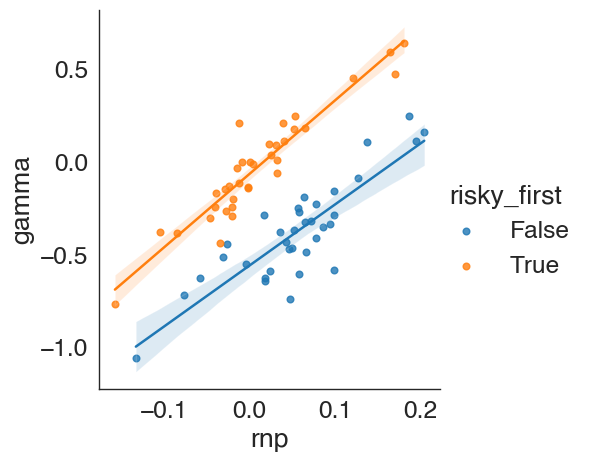

In [110]:
mean_pars = rnp_.groupby(['stimulation_condition', 'subject', 'risky_first']).mean().to_frame('mean')
ci_pars = rnp_.groupby(['stimulation_condition', 'subject', 'risky_first']).apply(lambda x: pd.Series(az.hdi(x.values.ravel(), .95), index=pd.Index(['ci_min', 'ci_max']))).to_frame('value').unstack(-1)['value']

rnp_stats = mean_pars.join(ci_pars)

mean_pars = gamma_.groupby(['stimulation_condition', 'subject', 'risky_first']).mean().to_frame('mean')
ci_pars = gamma_.groupby(['stimulation_condition', 'subject', 'risky_first']).apply(lambda x: pd.Series(az.hdi(x.values.ravel(), .95), index=pd.Index(['ci_min', 'ci_max']))).to_frame('value').unstack(-1)['value']

gamma_stats = mean_pars.join(ci_pars)


par_stats = pd.concat((rnp_stats, gamma_stats), axis=1, keys=['rnp', 'gamma'], names=['parameter']).xs('mean', 1, -1)


tmp = par_stats.unstack('stimulation_condition').swaplevel(axis=1)

diff = tmp['ips'] - tmp['vertex']


sns.lmplot(x='rnp', y='gamma', hue='risky_first', data=diff.reset_index())


0.7027313727191892

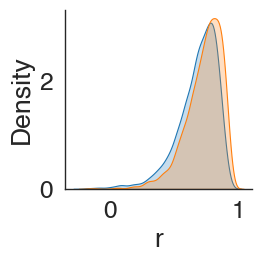

In [114]:
tmp = pd.concat((gamma, rnp), axis=1).groupby(['subject', 'stimulation_condition', 'risky_first', 'chain', 'draw']).mean()

tmp = tmp.unstack('stimulation_condition')

gamma_diff = tmp['gamma']['ips'] - tmp['gamma']['vertex']
gamma_diff.rename('gamma_diff', inplace=True)
rnp_diff = tmp['rnp']['ips'] - tmp['rnp']['vertex']
rnp_diff.rename('rnp_diff', inplace=True)

diff = pd.concat((gamma_diff, rnp_diff), axis=1)
r = diff.groupby(['chain', 'draw', 'risky_first']).apply(lambda d: ss.pearsonr(d['gamma_diff'], d['rnp_diff'])[0])
g = sns.FacetGrid(r.to_frame('r').reset_index(), sharex=False, hue='risky_first')
g.map(sns.kdeplot, 'r', fill=True)


r.mean()

# Subjectwise

In [55]:

intercept, gamma = extract_intercept_gamma(idata, model, data, group=False)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

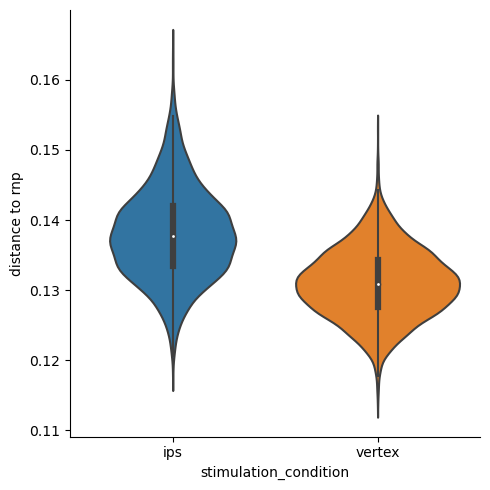

In [63]:
distance_to_rnp = rnp.groupby(['chain', 'draw', 'stimulation_condition']).apply(lambda d: (d - 0.55).abs().mean()).rename('distance to rnp')

sns.catplot(data=distance_to_rnp.reset_index(), x='stimulation_condition', y='distance to rnp', kind='violin')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_21324/4282490735.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tmp['ips'] - tmp['vertex'], shade=True)


0.82875

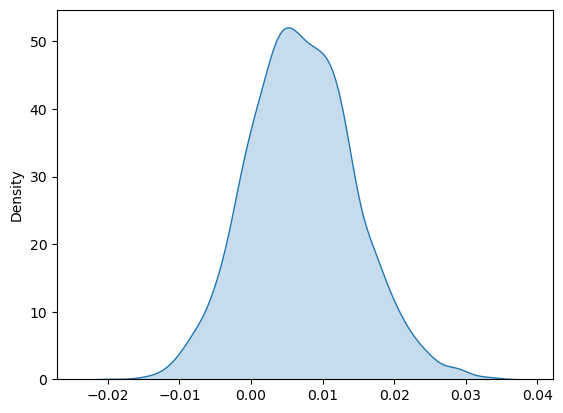

In [70]:
tmp = distance_to_rnp.unstack('stimulation_condition')
sns.kdeplot(tmp['ips'] - tmp['vertex'], shade=True)

((tmp['ips'] - tmp['vertex']) > 0).mean()

# Probit simple half

In [3]:
model_label = 'probit_simple_half'

data = get_data(model_label, bids_folder)
model = build_model(model_label, data)
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))


intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')


/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:66: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


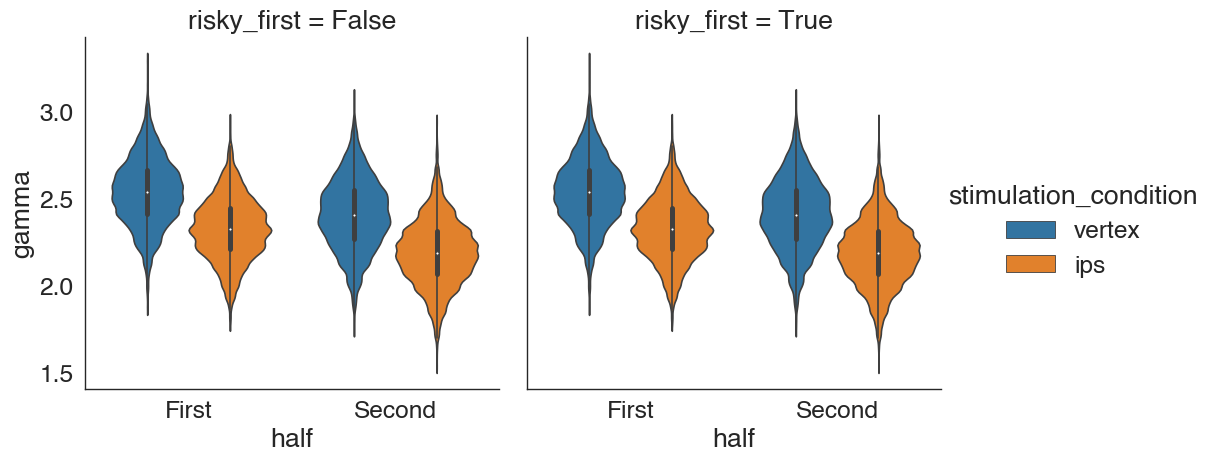

In [7]:
sns.catplot(gamma.reset_index(), x='half', y='gamma', hue='stimulation_condition', col='risky_first', kind='violin')

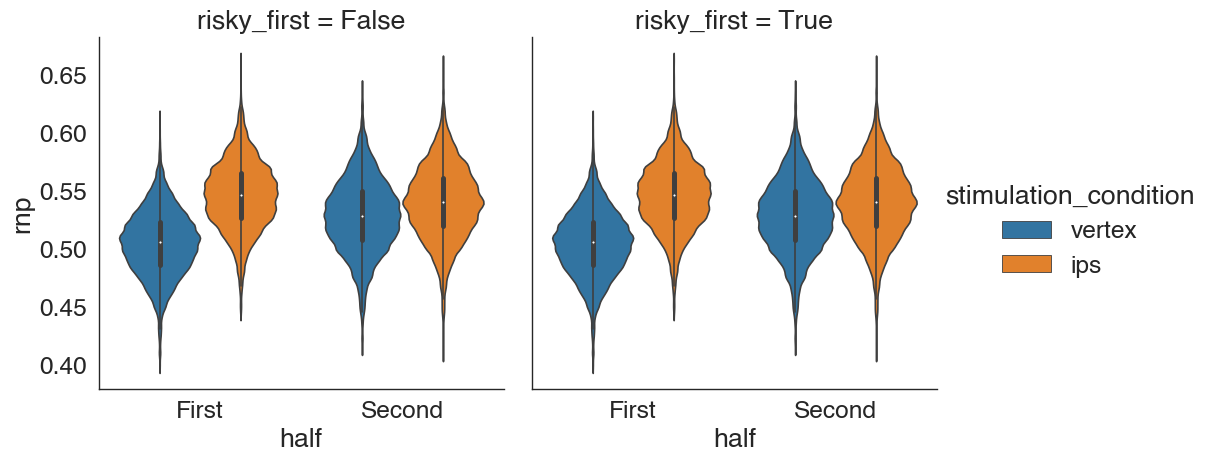

In [8]:
sns.catplot(rnp.reset_index(), x='half', y='rnp', hue='stimulation_condition', col='risky_first', kind='violin')

<Axes: ylabel='Density'>

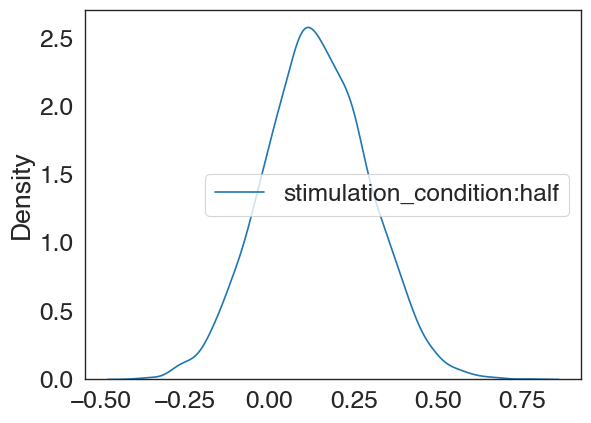

In [13]:
sns.kdeplot(idata.posterior['stimulation_condition:half'].to_dataframe())

<Axes: ylabel='Density'>

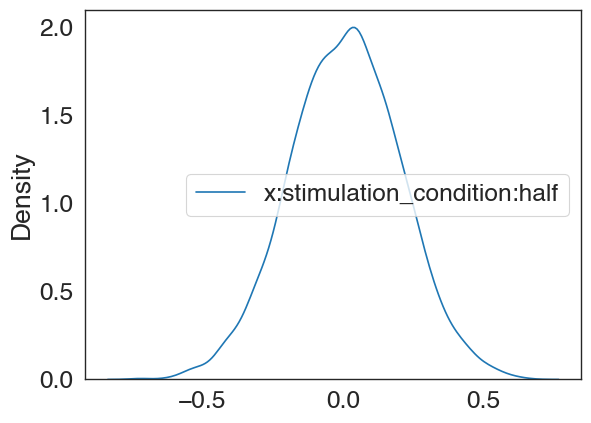

In [14]:
sns.kdeplot(idata.posterior['x:stimulation_condition:half'].to_dataframe())

# Probit order half

In [38]:
model_label = 'probit_order_half'


data = get_data(model_label, bids_folder)
model = build_model(model_label, data)

idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:81: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


In [39]:

intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

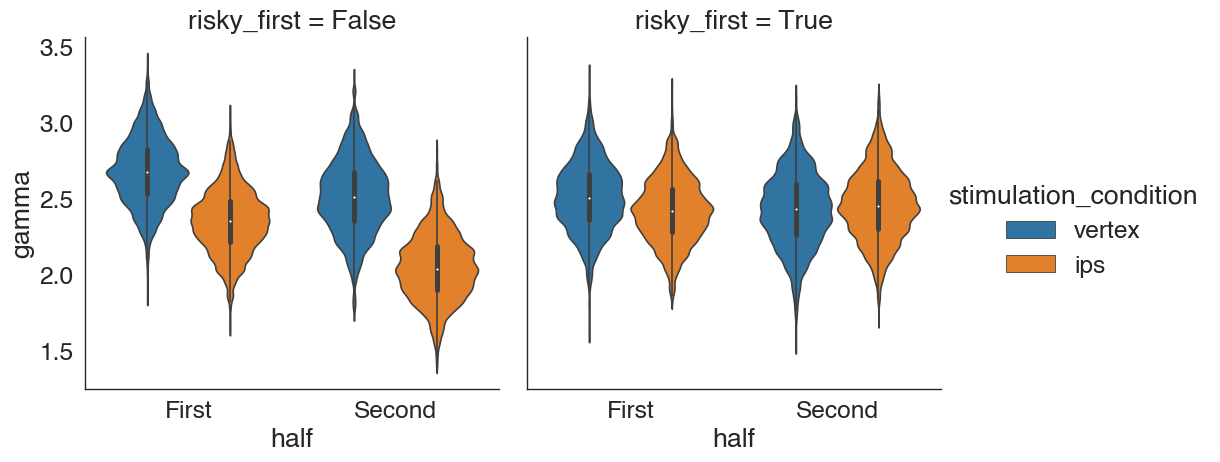

In [48]:
g = sns.catplot(x='half', hue='stimulation_condition', y='gamma', col='risky_first', data=gamma.reset_index(), kind='violin')

# g.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))

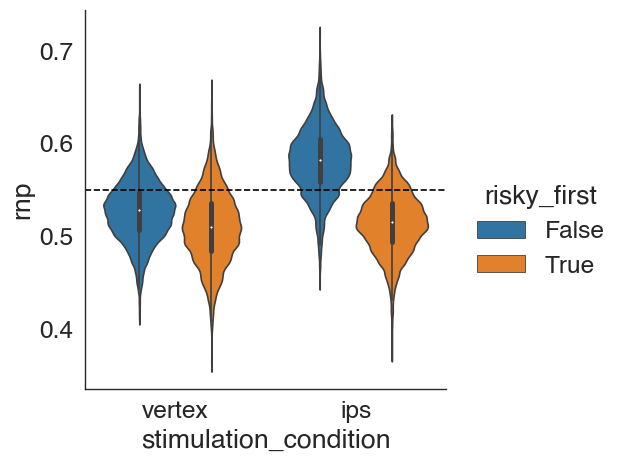

In [40]:
g = sns.catplot(x='stimulation_condition', y='rnp', hue='risky_first', data=rnp.reset_index(), kind='violin')

g.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))

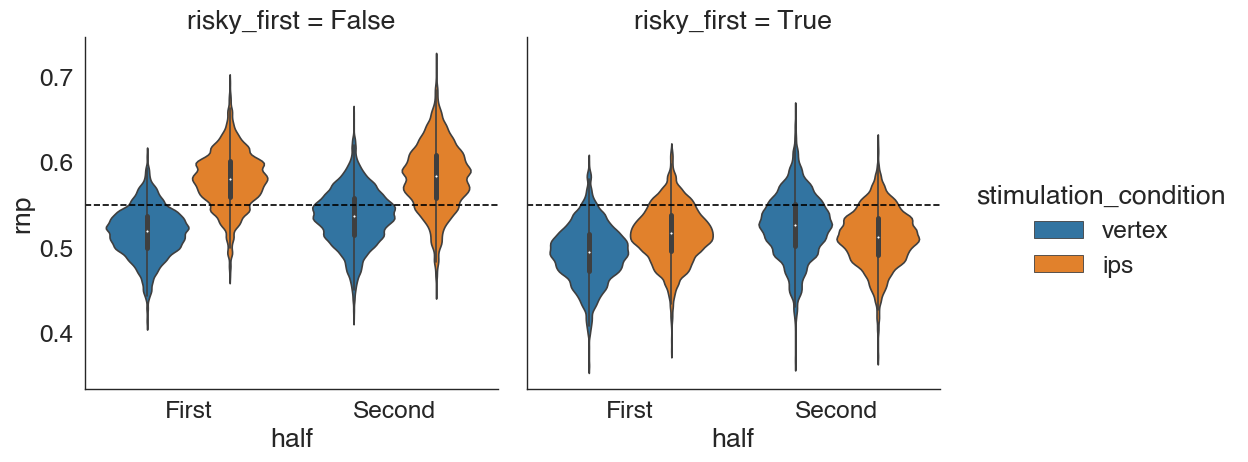

In [49]:
g = sns.catplot(x='half', hue='stimulation_condition', y='rnp', col='risky_first', data=rnp.reset_index(), kind='violin')

g.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))

In [53]:
data

stimulation_condition        rt    n1    n2  \
subject session run trial_nr                                               
1       2       1   1                       vertex  1.239692  28.0  86.0   
                    2                       vertex  0.836219   7.0  21.0   
                    3                       vertex  0.931371   7.0  21.0   
                    4                       vertex  1.135164  10.0  24.0   
                    5                       vertex  1.032161  20.0  44.0   
...                                            ...       ...   ...   ...   
74      3       6   116                     vertex  1.055890  37.0  20.0   
                    117                     vertex  0.739095  55.0  14.0   
                    118                     vertex  0.371731  22.0  20.0   
                    119                     vertex  0.705755  14.0  10.0   
                    120                     vertex  0.672241  15.0  14.0   

                                p1    p2  choice  risky_first  chose_risky  \
subject session run trial_nr                                                 
1       2       1   1         1.00  0.55     2.0        False         True   
                    2         1.00  0.55     2.0        False         True   
                    3         1.00  0.55     2.0        False         True   
                    4         1.00  0.55     1.0        False        False   
                    5         1.00  0.55     1.0        False        False   
...                            ...   ...     ...          ...          ...   
74      3       6   116       0.55  1.00     2.0         True        False   
                    117       0.55  1.00     2.0         True        False   
                    118       0.55  1.00     2.0         True        False   
                    119       0.55  1.00     2.0         True        False   
                    120       0.55  1.00     2.0         True        False   

                              n_risky  n_safe      frac  log(risky/safe)  \
subject session run trial_nr                                               
1       2       1   1            86.0    28.0  3.071429         1.122143   
                    2            21.0     7.0  3.000000         1.098612   
                    3            21.0     7.0  3.000000         1.098612   
                    4            24.0    10.0  2.400000         0.875469   
                    5            44.0    20.0  2.200000         0.788457   
...                               ...     ...       ...              ...   
74      3       6   116          37.0    20.0  1.850000         0.615186   
                    117          55.0    14.0  3.928571         1.368276   
                    118          22.0    20.0  1.100000         0.095310   
                    119          14.0    10.0  1.400000         0.336472   
                    120          15.0    14.0  1.071429         0.068993   

                               log(n1) bin(risky/safe)         x  session3  \
subject session run trial_nr                                                 
1       2       1   1         3.332205             80%  1.122143         0   
                    2         1.945910             80%  1.098612         0   
                    3         1.945910             80%  1.098612         0   
                    4         2.302585             44%  0.875469         0   
                    5         2.995732             44%  0.788457         0   
...                                ...             ...       ...       ...   
74      3       6   116       3.610918             44%  0.615186         1   
                    117       4.007333             80%  1.368276         1   
                    118       3.091042             20%  0.095310         1   
                    119       2.639057             32%  0.336472         1   
                    120       2.708050             20%  0.068993         1   

                     

0.7285

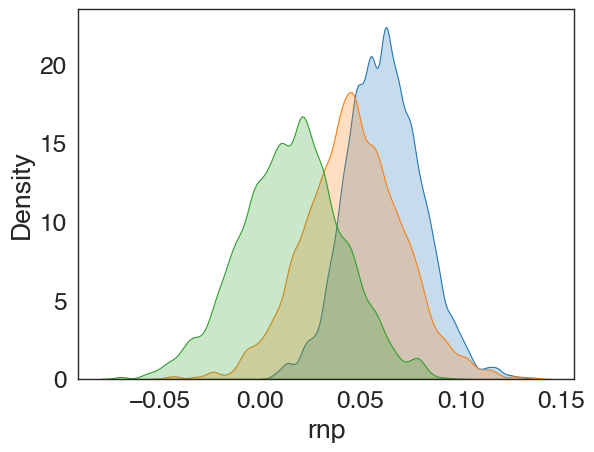

In [52]:
diff1 = rnp.xs(False, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('First', 0, 'half') - rnp.xs(False, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('First', 0, 'half')
diff2 = rnp.xs(False, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('Second', 0, 'half') - rnp.xs(False, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('Second', 0, 'half')
sns.kdeplot(diff1, fill=True)
sns.kdeplot(diff2, fill=True)

sns.kdeplot(diff1 -diff2, fill=True)

((diff1 - diff2) > 0).mean()

0.9435

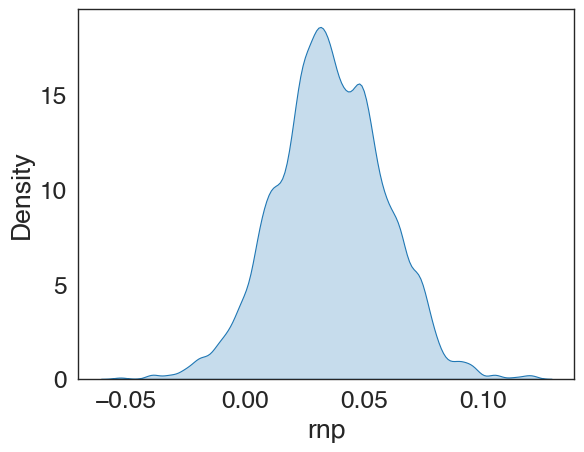

In [43]:
diff1 = rnp.xs(True, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('First', 0, 'half') - rnp.xs(True, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('First', 0, 'half')
diff2 = rnp.xs(True, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('Second', 0, 'half') - rnp.xs(True, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('Second', 0, 'half')
# sns.kdeplot(diff1, fill=True)
# sns.kdeplot(diff2, fill=True)

sns.kdeplot(diff1 -diff2, fill=True)
((diff1 - diff2) > 0).mean()

0.6925

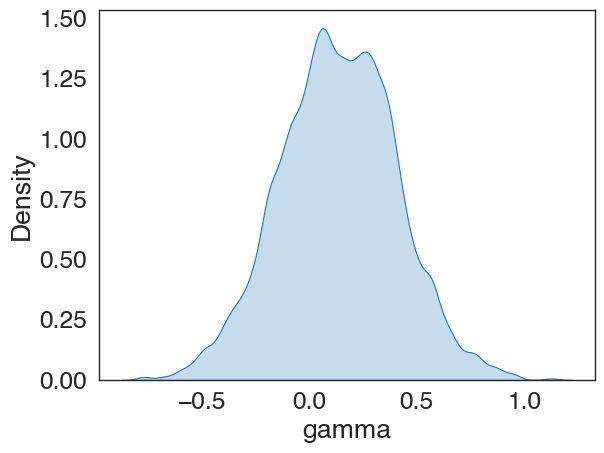

In [44]:
diff1 = gamma.xs(False, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('First', 0, 'half') - gamma.xs(False, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('First', 0, 'half')
diff2 = gamma.xs(False, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('Second', 0, 'half') - gamma.xs(False, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('Second', 0, 'half')
# sns.kdeplot(diff1, fill=True)
# sns.kdeplot(diff2, fill=True)

sns.kdeplot(diff1 -diff2, fill=True)

((diff1 - diff2) > 0).mean()

0.3345

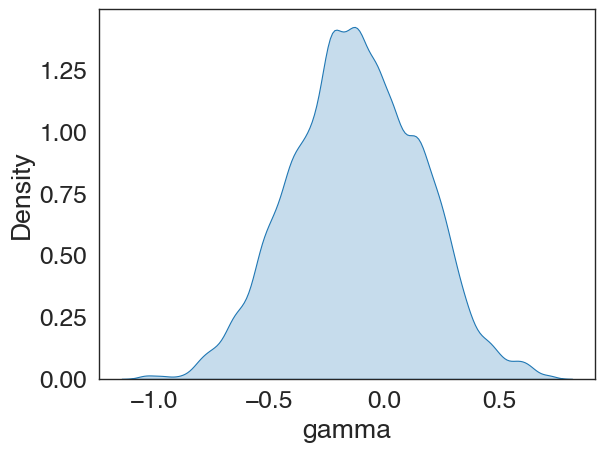

In [45]:
diff1 = gamma.xs(True, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('First', 0, 'half') - gamma.xs(True, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('First', 0, 'half')
diff2 = gamma.xs(True, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('Second', 0, 'half') - gamma.xs(True, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('Second', 0, 'half')
# sns.kdeplot(diff1, fill=True)
# sns.kdeplot(diff2, fill=True)

sns.kdeplot(diff1 -diff2, fill=True)

((diff1 - diff2) > 0).mean()

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

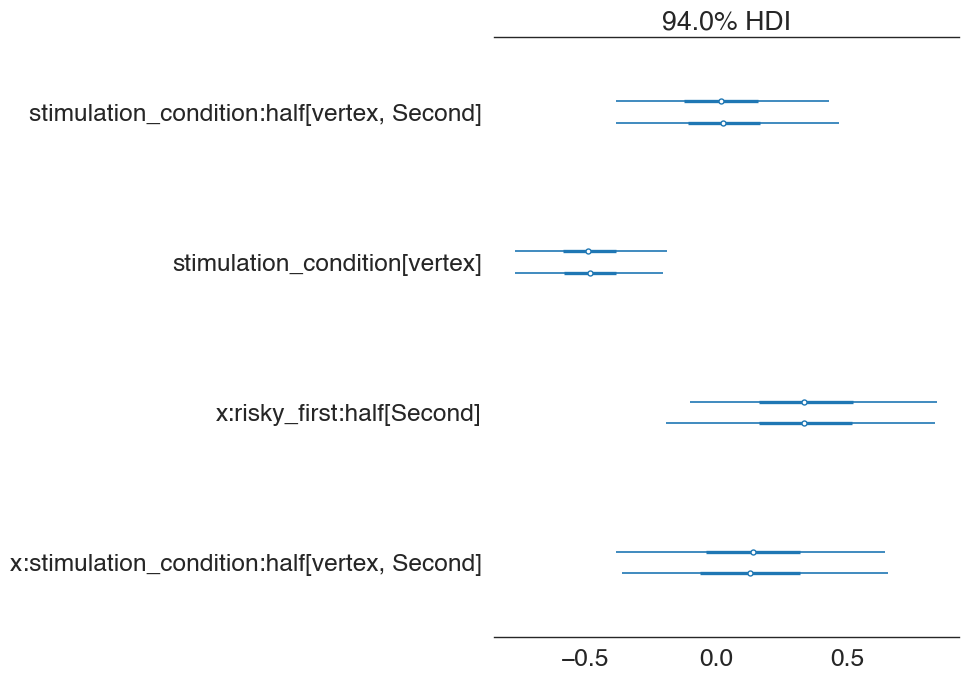

In [60]:
az.plot_forest(idata, var_names=['stimulation_condition:half', 'stimulation_condition', 'x:risky_first:half', 'x:stimulation_condition:half'])

# Full model

In [6]:
model_label = 'probit_full_model_session'

In [7]:
data = get_data(model_label, bids_folder)
model = build_model(model_label, data)
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))


intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

Dropping the baseline condition


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/data/ds-tmsrisk/derivatives/cogmodels/model-probit_full_model_session_trace.netcdf', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [5]:
rnp = rnp.to_frame()
gamma = gamma.to_frame()


rnp.set_index(pd.Series(rnp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'}), name='Order'), append=True, inplace=True)
gamma.set_index(pd.Series(gamma.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'}), name='Order'), append=True, inplace=True)

In [ ]:
tmp = rnp.unstack(['stimulation_condition'])['rnp']

tmp = (tmp['ips'] - tmp['vertex']).to_frame('diff')

g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='point', errorbar=get_ci, palette=['gray'], errwidth=3)
g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

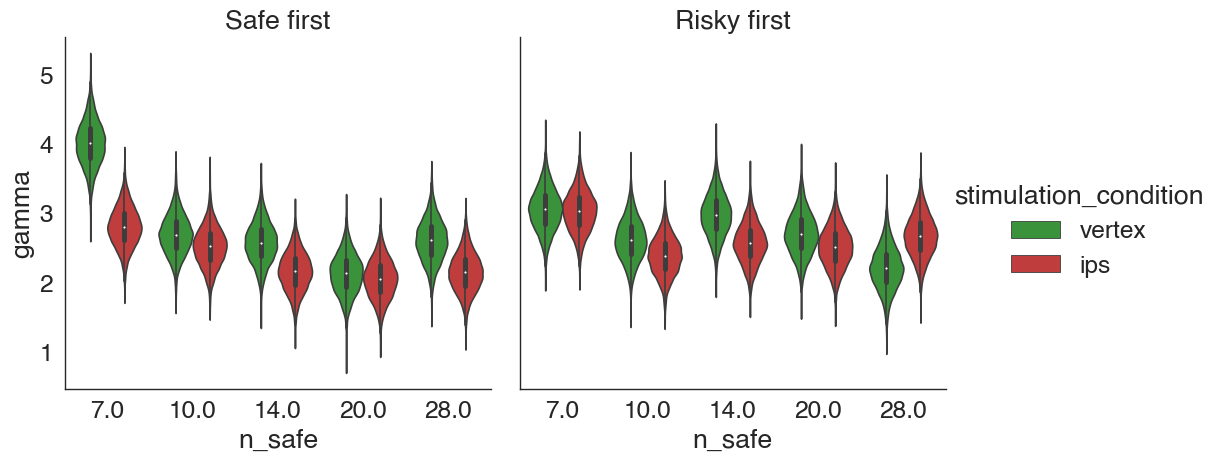

In [6]:
g = sns.catplot(data=gamma.reset_index(), x='n_safe', hue='stimulation_condition', y='gamma', col='Order', kind='violin', hue_order=stimulation_order, palette=stimulation_palette)
g.set_titles('{col_name}')

In [20]:
def get_ci(d):
    return az.hdi(d.values.ravel())

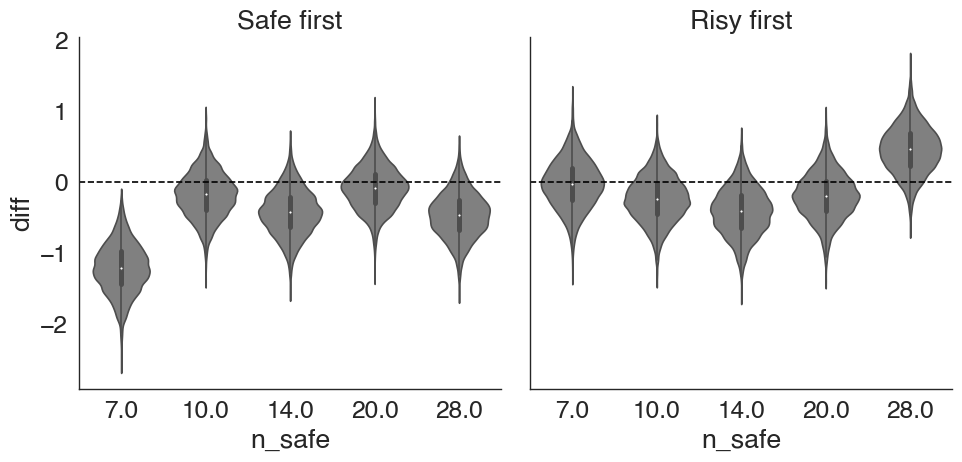

In [ ]:
tmp = gamma.unstack(['stimulation_condition'])['gamma']

tmp = (tmp['ips'] - tmp['vertex']).to_frame('diff')

g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='violin', palette=['gray'])
g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

g.set_titles('{col_name}')

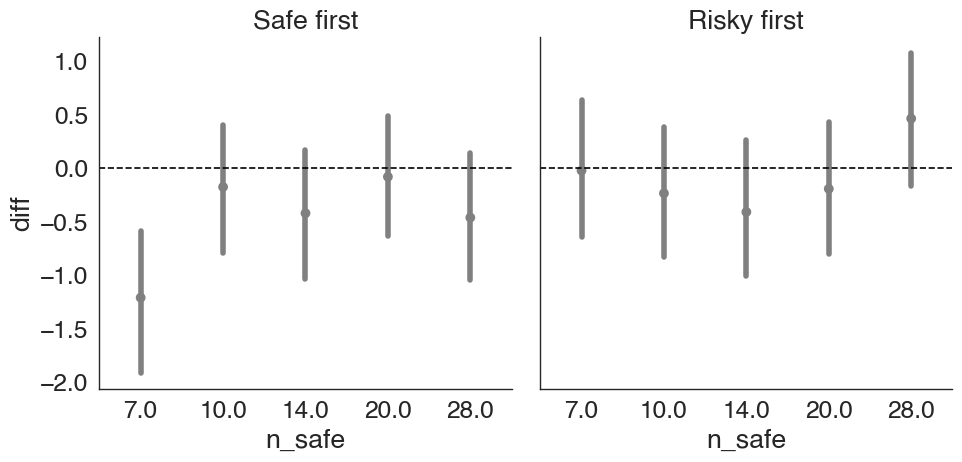

In [24]:
tmp = gamma.unstack(['stimulation_condition'])['gamma']

tmp = (tmp['ips'] - tmp['vertex']).to_frame('diff')

g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='point', palette=['gray'], errorbar=get_ci, errwidth=4)
g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

g.set_titles('{col_name}')

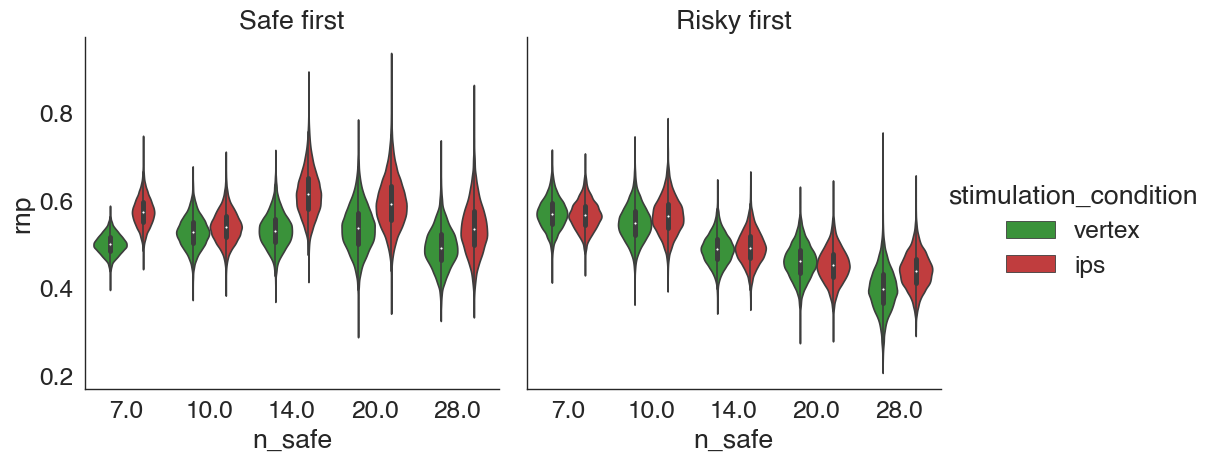

In [9]:
g = sns.catplot(data=rnp.reset_index(), x='n_safe', hue='stimulation_condition', y='rnp', col='Order', kind='violin', hue_order=stimulation_order, palette=stimulation_palette)
g.set_titles('{col_name}')

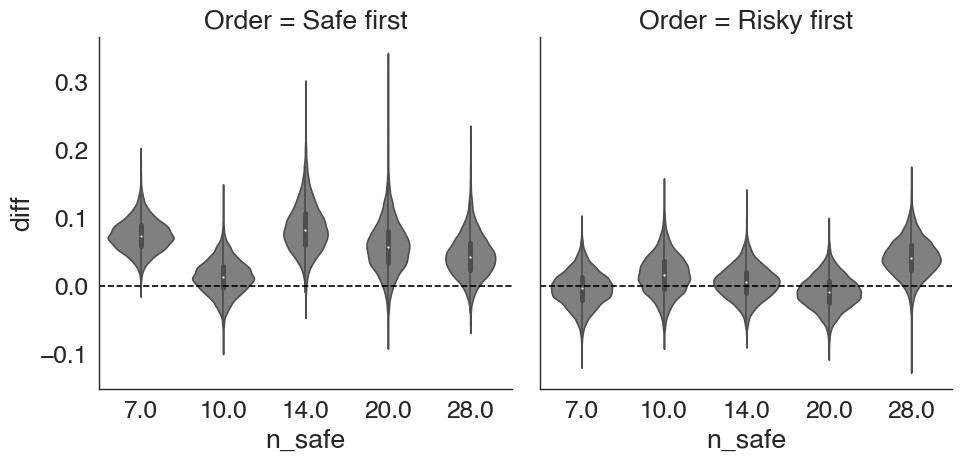

In [10]:
tmp = rnp.unstack(['stimulation_condition'])['rnp']

tmp = (tmp['ips'] - tmp['vertex']).to_frame('diff')

g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='violin', palette=['gray'])
g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

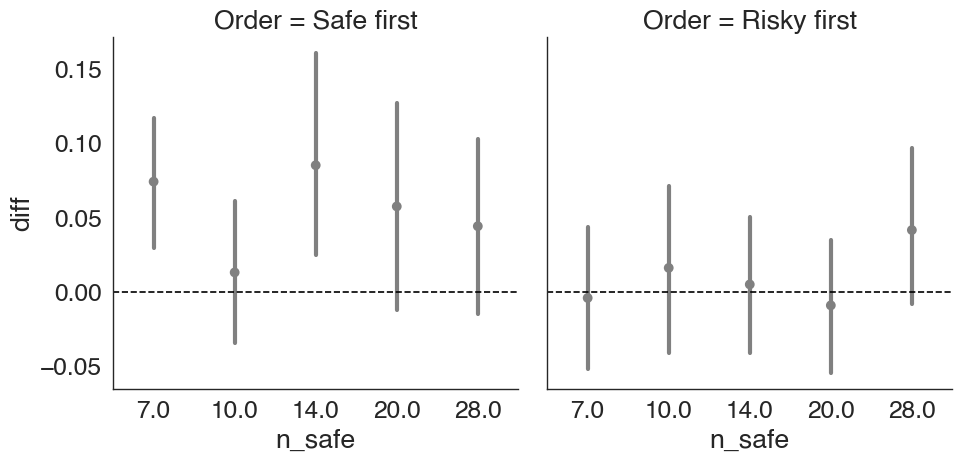

In [19]:
tmp = rnp.unstack(['stimulation_condition'])['rnp']

tmp = (tmp['ips'] - tmp['vertex']).to_frame('diff')

g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='point', errorbar=get_ci, palette=['gray'], errwidth=3)
g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

## Subjectwise

In [8]:

intercept, gamma = extract_intercept_gamma(idata, model, data, group=False)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

NameError: name 'idata' is not defined

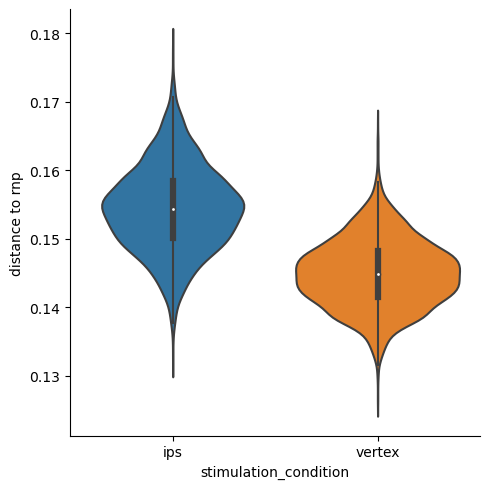

In [8]:
distance_to_rnp = rnp.groupby(['chain', 'draw', 'stimulation_condition']).apply(lambda d: (d - 0.55).abs().mean()).rename('distance to rnp')

sns.catplot(data=distance_to_rnp.reset_index(), x='stimulation_condition', y='distance to rnp', kind='violin')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_25884/4282490735.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tmp['ips'] - tmp['vertex'], shade=True)


0.90425

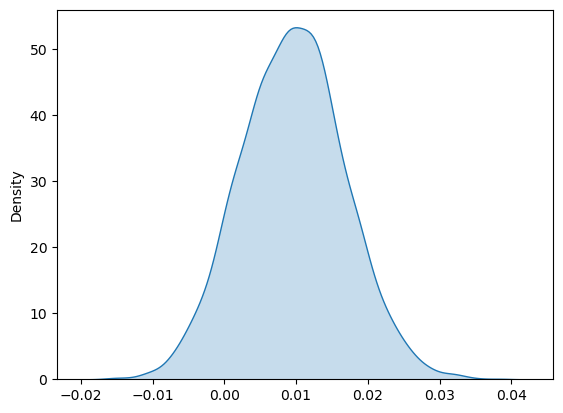

In [9]:
tmp = distance_to_rnp.unstack('stimulation_condition')
sns.kdeplot(tmp['ips'] - tmp['vertex'], shade=True)

((tmp['ips'] - tmp['vertex']) > 0).mean()